# Northwind Sales Database

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv

from feature_engine.outliers import Winsorizer

In [5]:
data = './data/Order Details.csv'

df_data = pd.read_csv(data)

df_data

,OrderID,ProductID,UnitPrice,Quantity,Discount
0,10248,11,14.00,12,0.00
1,10248,42,9.80,10,0.00
2,10248,72,34.80,5,0.00
3,10249,14,18.60,9,0.00
4,10249,51,42.40,40,0.00
...,...,...,...,...,...
2150,11077,64,33.25,2,0.03
2151,11077,66,17.00,1,0.00
2152,11077,73,15.00,2,0.01
2153,11077,75,7.75,4,0.00


In [9]:
discount_multiplier = 1 - df_data['Discount']
discount_multiplier

0       1.00
1       1.00
2       1.00
3       1.00
4       1.00
        ... 
2150    0.97
2151    1.00
2152    0.99
2153    1.00
2154    1.00
Name: Discount, Length: 2155, dtype: float64

In [12]:
df_data['NetRevenue'] = (df_data['UnitPrice'] * (discount_multiplier)).round(2)
df_data

,OrderID,ProductID,UnitPrice,Quantity,Discount,NetRevenue
0,10248,11,14.00,12,0.00,14.00
1,10248,42,9.80,10,0.00,9.80
2,10248,72,34.80,5,0.00,34.80
3,10249,14,18.60,9,0.00,18.60
4,10249,51,42.40,40,0.00,42.40
...,...,...,...,...,...,...
2150,11077,64,33.25,2,0.03,32.25
2151,11077,66,17.00,1,0.00,17.00
2152,11077,73,15.00,2,0.01,14.85
2153,11077,75,7.75,4,0.00,7.75


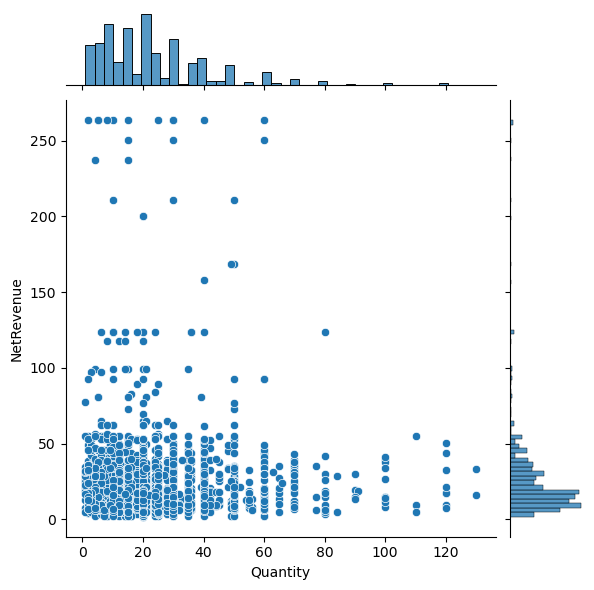

In [20]:
g = sns.jointplot(
    x='Quantity',
    y='NetRevenue',
    data=df_data,
    kind='scatter'
)

In [28]:
winsorizer = Winsorizer(capping_method = 'iqr', tail='both', fold=1.5, variables=['Quantity', 'NetRevenue'])

df_data_xf = winsorizer.fit_transform(df_data)
df_data_xf

,OrderID,ProductID,UnitPrice,Quantity,Discount,NetRevenue
0,10248,11,14.00,12,0.00,14.00
1,10248,42,9.80,10,0.00,9.80
2,10248,72,34.80,5,0.00,34.80
3,10249,14,18.60,9,0.00,18.60
4,10249,51,42.40,40,0.00,42.40
...,...,...,...,...,...,...
2150,11077,64,33.25,2,0.03,32.25
2151,11077,66,17.00,1,0.00,17.00
2152,11077,73,15.00,2,0.01,14.85
2153,11077,75,7.75,4,0.00,7.75


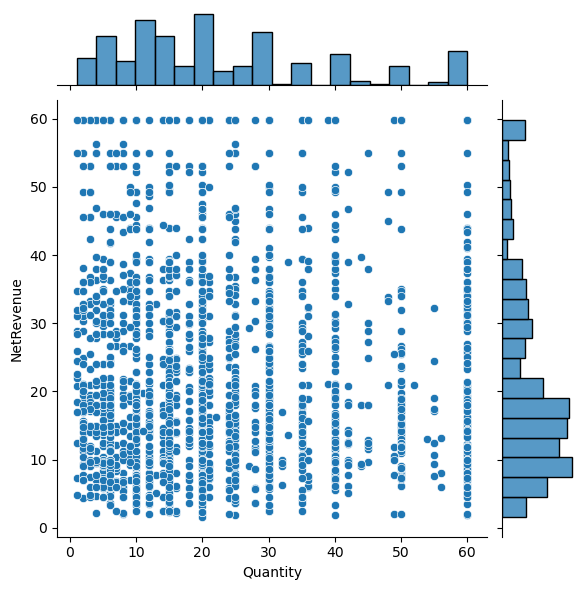

In [29]:
g = sns.jointplot(
    x='Quantity',
    y='NetRevenue',
    data=df_data_xf,
    kind='scatter'
)